## EDA 

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats import diagnostic
from statsmodels.tsa.seasonal import seasonal_decompose

# Load your dataset
df = pd.read_csv('dataset.csv')


In [2]:

# Exploratory Data Analysis (EDA)
# Overview of the dataset
print(df.head())


    DeviceName      Time          Routine Activity  RoomName DeviceStatus  \
0  SmartBlinds  06:17 AM  Wake up routine   Awaken   Bedroom         Open   
1       Lights  06:19 AM  Wake up routine   Awaken   Bedroom           On   
2       Lights  06:22 AM  Wake up routine  Bathing  Bathroom           On   
3  WaterHeater  06:24 AM  Wake up routine  Bathing  Bathroom           On   
4       Lights  06:32 AM  Wake up routine  Bathing  Bathroom          Off   

   Day  Hour  Minute  
0    1     6      17  
1    1     6      19  
2    1     6      22  
3    1     6      24  
4    1     6      32  


In [3]:

# Summary statistics
print(df.describe())


              Day        Hour      Minute
count  180.000000  180.000000  180.000000
mean     3.000000    6.011111   28.622222
std      1.418158    0.105114   14.690914
min      1.000000    6.000000    0.000000
25%      2.000000    6.000000   17.000000
50%      3.000000    6.000000   28.500000
75%      4.000000    6.000000   40.000000
max      5.000000    7.000000   59.000000


In [4]:

# Check for missing values
print(df.isnull().sum())


DeviceName      0
Time            0
Routine         0
Activity        0
RoomName        0
DeviceStatus    0
Day             0
Hour            0
Minute          0
dtype: int64


/Users/nethrashri/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


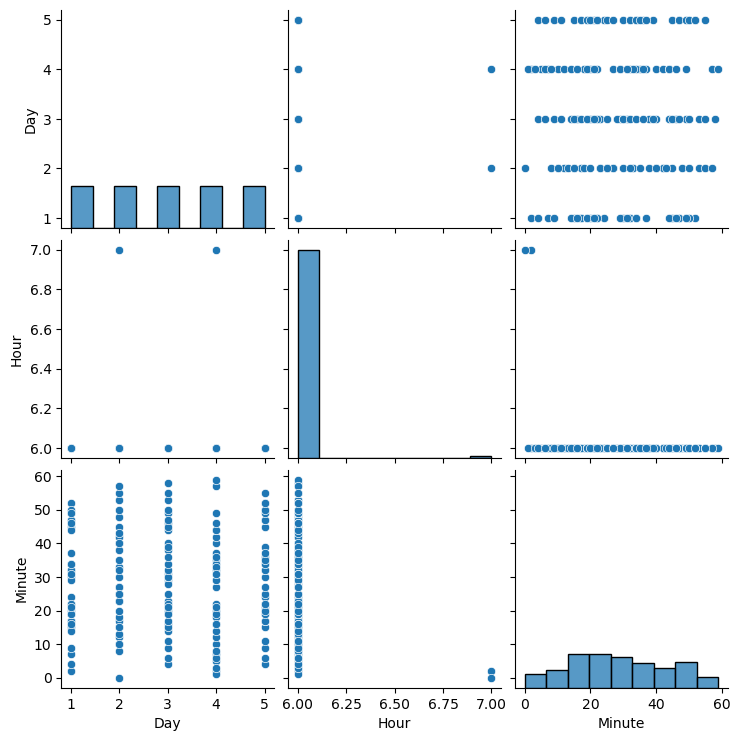

In [5]:

# Data distribution visualization
sns.pairplot(df)
plt.show()



In [10]:
df.columns

Index(['DeviceName', 'Time', 'Routine', 'Activity', 'RoomName', 'DeviceStatus',
       'Day', 'Hour', 'Minute', 'DeviceName_encoded'],
      dtype='object')

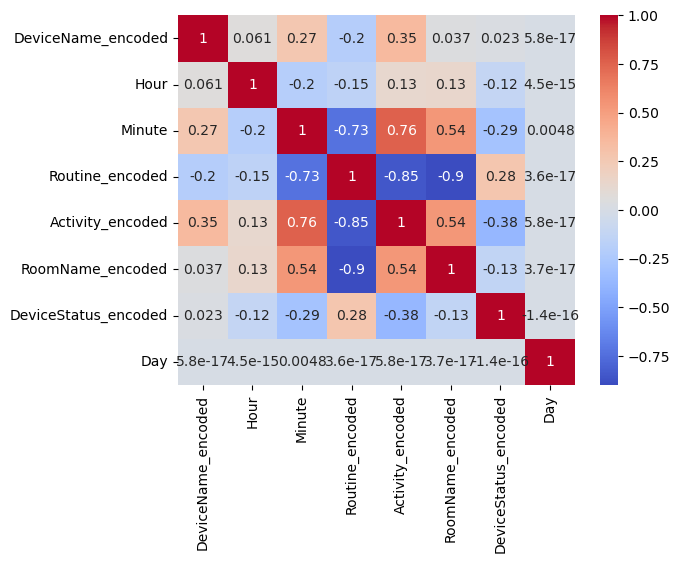

In [16]:
from sklearn.preprocessing import LabelEncoder

# Convert 'Time' to datetime format with specified format
df['Time'] = pd.to_datetime(df['Time'], format='%I:%M %p')

# Extract 'Hour' and 'Minute'
df['Hour'] = df['Time'].dt.hour
df['Minute'] = df['Time'].dt.minute

# Encode 'Routine' column
label_encoder_routine = LabelEncoder()
df['Routine_encoded'] = label_encoder_routine.fit_transform(df['Routine'])

# Encode 'Activity' column
label_encoder_activity = LabelEncoder()
df['Activity_encoded'] = label_encoder_activity.fit_transform(df['Activity'])

# Encode 'RoomName' column
label_encoder_room = LabelEncoder()
df['RoomName_encoded'] = label_encoder_room.fit_transform(df['RoomName'])

# Encode 'DeviceStatus' column
label_encoder_status = LabelEncoder()
df['DeviceStatus_encoded'] = label_encoder_status.fit_transform(df['DeviceStatus'])

# Correlation matrix
correlation_matrix = df[['DeviceName_encoded', 'Hour', 'Minute', 'Routine_encoded', 'Activity_encoded', 'RoomName_encoded', 'DeviceStatus_encoded', 'Day']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [19]:

# Grouped statistics
grouped_stats = df.groupby('Routine')['DeviceStatus_encoded'].agg(['mean', 'std', 'count'])
print(grouped_stats)


                       mean       std  count
Routine                                     
Breakfast routine  2.000000  2.178477     60
Wake up routine    2.833333  0.690066    120


In [25]:
# !pip install --upgrade pandas-profiling


In [27]:
# Import necessary libraries
from scipy.stats import ttest_ind
import pandas as pd

from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Assuming 'DeviceStatus' is a categorical variable
label_encoder_status = LabelEncoder()
df['DeviceStatus_encoded'] = label_encoder_status.fit_transform(df['DeviceStatus'])


In [41]:
# Assuming 'Wake up routine' is equivalent to 'A' and 'Breakfast routine' is equivalent to 'B'
group1 = df[df['Routine'] == 'Wake up routine']['DeviceStatus_encoded']
group2 = df[df['Routine'] == 'Breakfast routine']['DeviceStatus_encoded']

# Check if the groups have valid sizes
print(f'Group 1 size: {len(group1)}')
print(f'Group 2 size: {len(group2)}')

# Check unique values in each group
print(f'Unique values in Group 1: {group1.unique()}')
print(f'Unique values in Group 2: {group2.unique()}')

# Check missing values in each group
print(f'Missing values in Group 1: {group1.isnull().sum()}')
print(f'Missing values in Group 2: {group2.isnull().sum()}')

# Perform t-test
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(group1, group2, nan_policy='omit')  # 'omit' ignores NaN values
print(f'T-statistic: {t_stat}, p-value: {p_value}')


Group 1 size: 120
Group 2 size: 60
Unique values in Group 1: [4 3 2]
Unique values in Group 2: [0 5 1]
Missing values in Group 1: 0
Missing values in Group 2: 0
T-statistic: 3.8322928707060857, p-value: 0.00017588184576638988



It appears that the filtering conditions for group1 and group2 might not be matching any rows in the DataFrame. The fact that both Group 1 and Group 2 have a size of 0 indicates that there are no rows where 'Routine' is equal to 'A' or 'B'. Based on your provided information, it seems that the actual routine values in your DataFrame are 'Wake up routine' and 'Breakfast routine'.

In [29]:

# Descriptive Statistics
# Grouped statistics (example: mean device status for each routine)
grouped_stats = df.groupby('Routine')['DeviceStatus_encoded'].agg(['mean', 'std', 'count'])
print(grouped_stats)


                       mean       std  count
Routine                                     
Breakfast routine  2.000000  2.178477     60
Wake up routine    2.833333  0.690066    120


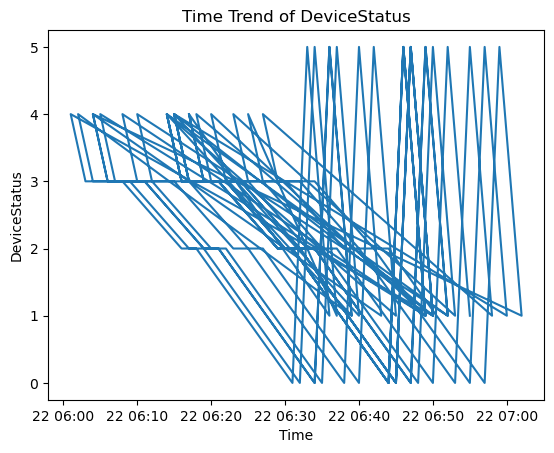

In [31]:


# Time Trend
# Plotting time trend of DeviceStatus
df['DateTime'] = pd.to_datetime(df['Time'])
df.set_index('DateTime', inplace=True)

plt.plot(df['DeviceStatus_encoded'])
plt.title('Time Trend of DeviceStatus')
plt.xlabel('Time')
plt.ylabel('DeviceStatus')
plt.show()

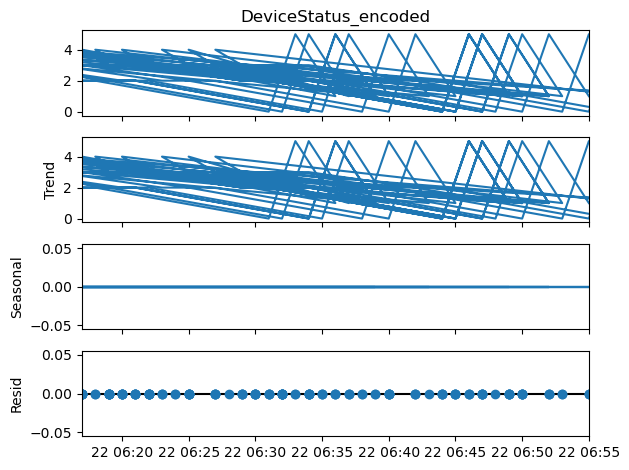

In [32]:



# Time Series Analysis
# Decomposition of time series data
result = seasonal_decompose(df['DeviceStatus_encoded'], model='additive', period=1)
result.plot()
plt.show()


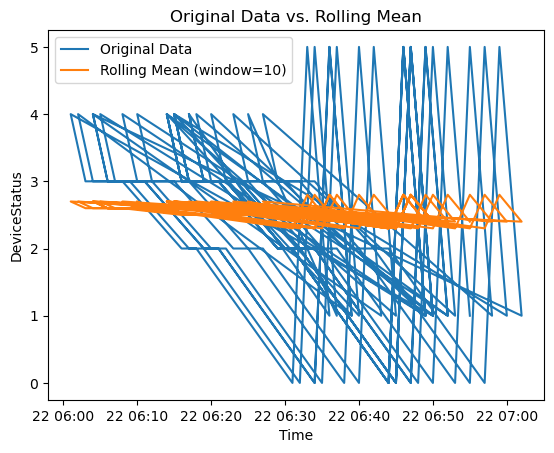

In [33]:

# Pattern Understanding
# Explore patterns in the data (example: using rolling mean)
df['DeviceStatus_rolling_mean'] = df['DeviceStatus_encoded'].rolling(window=10).mean()

plt.plot(df['DeviceStatus_encoded'], label='Original Data')
plt.plot(df['DeviceStatus_rolling_mean'], label='Rolling Mean (window=10)')
plt.title('Original Data vs. Rolling Mean')
plt.xlabel('Time')
plt.ylabel('DeviceStatus')
plt.legend()
plt.show()

In [43]:


# Function to get device recommendations based on user's patterns
def get_recommendations(user_room, user_activity, user_time):
    user_room_encoded = label_encoder_room.transform([user_room])[0]
    user_activity_encoded = label_encoder_activity.transform([user_activity])[0]

    # Find the index of the user's Room-Activity pair in the similarity matrix
    index = user_item_matrix.index.get_loc((user_room_encoded, user_activity_encoded))

    # Get the similarity scores for all Room-Activity pairs
    sim_scores = list(enumerate(cosine_sim[index]))

    # Sort the Room-Activity pairs based on similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the top recommendations
    top_recommendations = sim_scores[1:4]  # Exclude the user's own pattern
    top_indices = [i[0] for i in top_recommendations]

    # Get the corresponding Room-Activity pairs
    recommendations = user_item_matrix.iloc[top_indices].index

    # Reverse transform the indices back to original categorical values
    recommendations = [(label_encoder_room.inverse_transform([pair[0]])[0],
                        label_encoder_activity.inverse_transform([pair[1]])[0])
                       for pair in recommendations]

    return recommendations

# Example usage
user_room = 'Bedroom'
user_activity = 'Awaken'
user_time = 17

recommendations = get_recommendations(user_room, user_activity, user_time)
print("Top 3 Recommendations:")
print(recommendations)


Top 3 Recommendations:
[('Bathroom', 'Bathing'), ('Livingroom', 'Breakfast')]
